# IT-Talents Race Analysis

## Structure

### 1. Cleaning
### 2. Analyzing
### 3. Predicting

Importing the basic libraries

In [1]:
import pandas as pd # For data management
import numpy as np # For math and array functions
import matplotlib.pyplot as plt # For plotting

## 1. Loading and Cleaning
We will load the data and check if we need to clean something up

In [2]:
# Loading the dataset with pandas
allRaces = pd.read_csv('races.csv', sep=';', index_col='id')

In [3]:
# having a quick peek at the header
list(allRaces)

['race_created',
 'race_driven',
 'track_id',
 'challenger',
 'opponent',
 'money',
 'fuel_consumption',
 'winner',
 'status',
 'forecast',
 'weather']

In [4]:
# checking out how the values could look like
allRaces.values[1]

array(['06.03.2012', '06.03.2012 00:03', 12, 5, 4, 30, '0.63', 4,
       'finished',
       'a:4:{s:5:"sunny";i:70;s:5:"rainy";i:15;s:8:"thundery";i:0;s:5:"snowy";i:15;}',
       'sunny'], dtype=object)

In [5]:
# Fuel consumption is a string but should be a number, so lets fix that
allRaces[['fuel_consumption']] = allRaces[['fuel_consumption']].apply(pd.to_numeric, errors='coerce')

In [6]:
allRaces.values[1] # Now fuel consumption is a nice float variable

array(['06.03.2012', '06.03.2012 00:03', 12, 5, 4, 30, 0.63, 4, 'finished',
       'a:4:{s:5:"sunny";i:70;s:5:"rainy";i:15;s:8:"thundery";i:0;s:5:"snowy";i:15;}',
       'sunny'], dtype=object)

There will be more to change and to clean later, but we will just do that as soon as we need to

## 2. Analyzing
In this chapter we answer some questions about the data 

### 2.1 Does weather affect the fuel consumption?
This question can only be awnsered by completed races. Therefore we only include finished races

In [7]:
finished = allRaces.loc[allRaces['status'] == 'finished'] # Select all the finished races
finished.groupby(['weather'], as_index=False).mean()[['weather', 'fuel_consumption']] # Get the mean of every weather

,weather,fuel_consumption
0,rainy,9.807224
1,snowy,9.790905
2,sunny,9.495855
3,thundery,9.774463


There seems to be no correlation. The averages of the fuel_consumption are the same in all kinds of weather conditions.

### 2.2 Which track is the most popular?
For this question we regard all races again

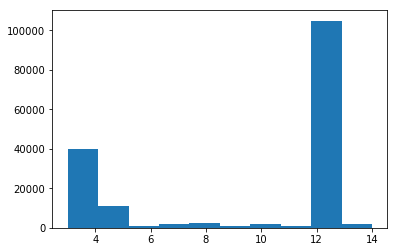

In [8]:
#Lets get the most populat tracks
plt.hist(allRaces['track_id'].values)
plt.show()

As you can see this is a very uneven distribution. Track 12 seems to be the most popular by far. 
Lets check the absolute numbers

In [9]:
allRaces['track_id'].value_counts()

12    104878
3      38114
5      10901
8       2206
7       2132
4       1995
10      1806
13      1471
9        903
6        797
11       777
14       629
Name: track_id, dtype: int64

We will get back analyzing the track data so lets just save the amount of races per track and the IDs

In [10]:
# Lets save that
tracks = pd.DataFrame(allRaces['track_id'].value_counts())
tracks.columns = ['races']
tracks.index.name = 'track_id'
tracks

,races
track_id,
12,104878
3,38114
5,10901
8,2206
7,2132
4,1995
10,1806
13,1471
9,903


### 2.3 Cont' fuel_consumption and weather
As track 12 is the most popular, lets check wether there is an correlation between the fuel_consumption and the weather on this one

In [11]:
# The most popular track seems to be track 12, so lets check our "weather affects fuel_consumption"-hypothesis only on track 12
finishedOnTrack12 = finished.loc[allRaces['track_id'] == 12]
finishedOnTrack12.groupby(['weather'], as_index=False).mean()[['weather', 'fuel_consumption']]

,weather,fuel_consumption
0,rainy,9.457026
1,snowy,9.709260
2,sunny,9.362550
3,thundery,9.799436


There still seems to be no significant correlation between the weather and the fuel_consumption. But there is still a small effect. We can say that driving in the sun takes slightly less fuel than in thundery weather

### 2.4 Cont' popular tracks and paretos law

In [12]:
# Lets further investigate the track preferances of the players, this time in percentages
popularity = allRaces['track_id'].value_counts() / allRaces['track_id'].value_counts().values.sum() * 100
popularity

12    62.948580
3     22.876315
5      6.542864
8      1.324058
7      1.279643
4      1.197414
10     1.083975
13     0.882905
9      0.541988
6      0.478366
11     0.466361
14     0.377531
Name: track_id, dtype: float64

As you can see, track 12 and 3 account to over 84% of the races. This is parettos law: 2/12 tracks account for more than 80% of the races. The remaining 10 tracks only accout for about 14% of the races.

In [13]:
# Lets save that
tracks['pupularity'] = popularity

### 2.5 Which track gets finished more/less often?
Not all races get finished, many of them get canceled before and some after start. Lets check wether some tracks have more canceled races than others.  

In [14]:
# Are there any maps that get finished more often?
finishedRatio = finished['track_id'].value_counts() / allRaces['track_id'].value_counts() * 100
finishedRatio = finishedRatio.sort_values()
finishedRatio

3     59.455843
11    62.162162
4     63.909774
8     63.961922
5     64.397762
13    65.941536
10    66.666667
12    67.511776
6     68.381430
9     71.871539
7     74.953096
14    75.993641
Name: track_id, dtype: float64

The most finished track is track 14, the track that gets finished the least is track 3. As track 3 and 12 are the most popular tracks, it is interesting to see that they have quite a big gap regarding the finished to unfinished races ratio. Track 3 gets finished a lot less than track 12.

In [15]:
# Lets save that
tracks['finishedRatio'] = finishedRatio

### 2.6 How does fuel_consumption differ on multiple tracks?
As the tracks are probably different in length, it is likely that they also differ in average fuel_consumption. Lets check that, for obvious reasons lets only consider finished races

In [16]:
meanFuelConsumption = pd.DataFrame(finished[['track_id', 'fuel_consumption']].dropna().groupby(['track_id'], as_index=False).mean())
meanFuelConsumption = meanFuelConsumption.set_index(['track_id'])
meanFuelConsumption.sort_values('fuel_consumption')

,fuel_consumption
track_id,
4,0.923791
13,2.421139
7,2.592874
9,3.621559
10,4.731765
5,4.817917
12,9.483578
3,12.567264
6,12.696661


There is quite a range of neccessary fuel for the different tracks. Probably they differ a lot in length. We can assume that probably track 4 is the shortest and track 14 the longest. By this meassure track 14 is probably more than 20 times longer than track 4. The most popular track 12 is pretty much in the middle with its needed fuel of 9.48 units on average.

In [17]:
# Lets save that
tracks['meanFuelConsumption'] = meanFuelConsumption['fuel_consumption']

### 2.7 How much money do the players pay on the different tracks?
Lets take the averages for all tracks

In [18]:
# Lets also include the average money per track
meanMoney = pd.DataFrame(finished[['track_id', 'fuel_consumption', 'money']].dropna().groupby(['track_id'], as_index=False).mean())
meanMoney = meanMoney.set_index(['track_id'])
meanMoney.sort_values('money')

,fuel_consumption,money
track_id,,
10,4.731765,114.959044
11,12.920609,157.173210
7,2.592874,194.263502
13,2.421139,263.209809
3,12.567264,279.959315
8,13.147491,316.334545
4,0.923791,349.598901
14,18.831907,1062.404819
9,3.621559,1224.504695


Track 12, which is the most popular has ranks very high when we compare the money. An explenation for that could be that only new players who dont have a lot of money play the other maps and the more experienced and 'richer' players play only track 12 and 6. But this is just a theory.

In [19]:
# Lets save that
tracks['meanMoney'] = meanMoney['money']

### 2.8 Lets find correlations
We got quite some knowladge about the different tracks now. Take a look at the table bellow to see what we got. Lets find some correlations between the values.

In [20]:
tracks

,races,pupularity,finishedRatio,meanFuelConsumption,meanMoney
track_id,,,,,
12,104878,62.948580,67.511776,9.483578,2699.662897
3,38114,22.876315,59.455843,12.567264,279.959315
5,10901,6.542864,64.397762,4.817917,1402.618701
8,2206,1.324058,63.961922,13.147491,316.334545
7,2132,1.279643,74.953096,2.592874,194.263502
4,1995,1.197414,63.909774,0.923791,349.598901
10,1806,1.083975,66.666667,4.731765,114.959044
13,1471,0.882905,65.941536,2.421139,263.209809
9,903,0.541988,71.871539,3.621559,1224.504695


In [21]:
# Lets see if there is any correlations between the different attributes of the tracks
tracks.corr()

,races,pupularity,finishedRatio,meanFuelConsumption,meanMoney
races,1.000000,1.000000,-0.159806,0.123604,0.434617
pupularity,1.000000,1.000000,-0.159806,0.123604,0.434617
finishedRatio,-0.159806,-0.159806,1.000000,0.010400,0.219718
meanFuelConsumption,0.123604,0.123604,0.010400,1.000000,0.252360
meanMoney,0.434617,0.434617,0.219718,0.252360,1.000000


There is quite a correlation between popularity and meanMoney. We stated an explenation for that in the previous chapter. The other correlations are not very strong.

### 2.9 Is there a correlation between the popularity of a track and the money?
Lets investigate this by visualising

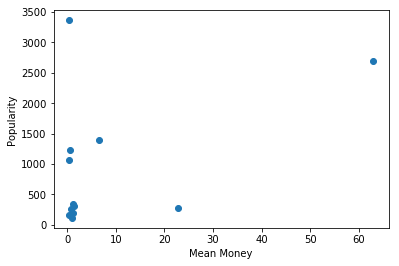

In [22]:
# There seems to be a correlation between the Money and the popularity of the track, lets investigate
x, y = tracks[['pupularity', 'meanMoney']].values.T
plt.scatter(x, y)
plt.ylabel("Popularity")
plt.xlabel("Mean Money")
plt.show()

Track 12 is an outlayer. It seems to be a litte far fatched to talk of a correlation here, but it is interesting that the most popular track is also one of the ones with the heighest mean money. Maybe only casual players with little money race on the other maps.

### 2.10 What is the most likely weather?

In [23]:
allRaces['weather'].value_counts() / allRaces['weather'].value_counts().sum() * 100

sunny       50.145281
rainy       25.015811
thundery    12.463909
snowy       12.374999
Name: weather, dtype: float64

Sunny is the most likely. How about on the different tracks?

In [24]:
tracksWeather = pd.DataFrame(columns=('rainy', 'snowy', 'sunny', 'thundery'))
tracksWeather.index.name = 'track_id'

for x in range(3, 15):
    onlyTrack = allRaces.loc[allRaces['track_id'] == x]
    tracksWeather.loc[x] = onlyTrack['weather'].value_counts(normalize=True).sort_index().values

tracksWeather

,rainy,snowy,sunny,thundery
track_id,,,,
3,0.248268,0.125502,0.500375,0.125855
4,0.259608,0.116863,0.492549,0.130980
5,0.254416,0.125071,0.492165,0.128348
6,0.253211,0.130275,0.506422,0.110092
7,0.232791,0.133917,0.518148,0.115144
8,0.253012,0.115521,0.503189,0.128278
9,0.269646,0.130971,0.471495,0.127889
10,0.230897,0.126246,0.503322,0.139535
11,0.256729,0.120083,0.509317,0.113872


The distribution of the probabilites for the different weathers seem to be quite similar on the different tracks. Eighter is is random or players allways choose the weather with always the same chances on every track.

In [25]:
# Lets save that
tracks = tracks.join(tracksWeather)

### 3.11 On which weather do the player spend the most money?

In [26]:
finished.groupby(['weather'], as_index=False).mean()[['weather', 'money']].sort_values("money")

,weather,money
3,thundery,1888.424474
1,snowy,1971.035849
0,rainy,2190.531841
2,sunny,2313.629561


They spend the most money in the sun

### 3.12 Is the opponent or the challenger more likely to win?

In [27]:
challenger = 0
opponent = 0

for row in finished.itertuples():
    if getattr(row, 'winner') == getattr(row, 'challenger'):
        challenger = challenger + 1
    elif getattr(row, 'winner') == getattr(row, 'opponent'):
        opponent = opponent + 1
    else:
        raise Exception('Winner is nighter opponent nor challenger')
        
challenger / (challenger + opponent) * 100

56.076590986168526

The challenger is slightly more likely to win. Challengers in 56% of the time. We can use that later as a feature for our prediction of races.

### 3.13 Do older accounts win over newer accouts?
Older accounts should have a lower id-number, while newer accounts should have a heigher one. Therefore could lower id drivers have more experience and win more often. Lets check if that is true.

In [28]:
lowerId = 0
higherId = 0

for row in finished.itertuples():
    winnerId = getattr(row, 'winner')
    loserId = -1
    if winnerId == getattr(row, 'challenger'):
        loserId = getattr(row, 'opponent')
    elif winnerId == getattr(row, 'opponent'):
        loserId = getattr(row, 'challenger')
        
    if loserId == -1:
        raise Exception('Something went wrong')
    
    if winnerId > loserId:
        higherId = higherId + 1
    elif winnerId < loserId:
        lowerId = lowerId + 1
    else:
        raise Exception("Something went wrong")
    
lowerId / (lowerId + higherId) * 100

66.42865654130652

This hypothesis can assumed to be true, lowerIds (probably older accounts) win significantly more often than higher ids (66%). We can also use that later as a feature for our prediction of races.

### 2.14 How many races get finished?

In [29]:
allRaces['status'].value_counts(normalize=True) * 100

finished    65.482057
retired     25.943376
declined     6.837566
waiting      1.737001
Name: status, dtype: float64

Only 65% of all races get finished. All the others are declined, retired or waiting.

### 2.15 On which days happen the most races? 

In [30]:
# First we convert the string of race_driven into datetimes
allRaces['race_driven'] = pd.to_datetime(allRaces['race_driven'], errors='coerce')

In [31]:
# Lets create a field for weekdays
allRaces['weekday'] = allRaces.apply(lambda row: row['race_driven'].isoweekday(), axis=1)

In [32]:
allRaces['weekday'].value_counts()

7.0    17212
1.0    16069
3.0    16036
2.0    15335
6.0    15136
5.0    14711
4.0    14600
Name: weekday, dtype: int64

Most races are done on sunday and monday. Thursday and friday are the days in which the least races happen.

### 2.16 At which hours happen the most races?

In [33]:
allRaces['hour'] = allRaces.apply(lambda row: row['race_driven'].hour, axis=1)

In [34]:
allRaces['hour'].value_counts()

21.0    8281
20.0    7956
14.0    7310
19.0    7082
18.0    6991
13.0    6982
22.0    6945
15.0    6767
17.0    6688
12.0    6394
16.0    6143
11.0    4696
23.0    4690
0.0     4540
10.0    4053
9.0     3074
8.0     2233
1.0     1960
6.0     1857
7.0     1778
2.0     1154
3.0      649
5.0      442
4.0      434
Name: hour, dtype: int64

The most popular hours for races are 21:00 and 20:00. Between 3:00 and 5:00 are the least popular. Just as expected.

### 2.17 How did the amount of done races per month develope? 

In [35]:
import datetime
import math
import time

firstDate = allRaces.values[0][1].timestamp();
allRaces['time_number'] = allRaces.apply(lambda row: (row['race_driven'].timestamp() - firstDate), axis=1, ignore_failures=True)
dates = allRaces.dropna().apply(lambda row: int(row['time_number'] / 60 / 60 / 24 / 30), axis=1, ignore_failures=True)

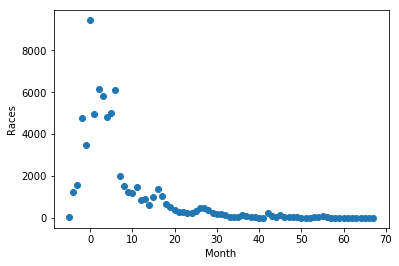

In [36]:
y = dates.value_counts().values
x = dates.value_counts().index

plt.scatter(x, y)
plt.ylabel("Races")
plt.xlabel("Month")
plt.show()

As you can see in the chart, the first couple of months there was a spike in players and then a steady decline after the 20th month. There are little spikes in regular intervals but it looks quite smooth.

## 3 Prediction
Given two players we want to predict the outcome of the race. First of all we have to engineer some features.

### 3.1 Features

#### Feature ideas
1) Who is the challanger? As seen before, this has some predictive value.
2) Who had more games? I think the more games a player had, the more experieced and skilled he should be.
3) Who has the older account? We have proofen before that this has predictive value.
4) Who won more games? People who win more probably have a higher chance to win again.
5) Who has a higher win/loos ratio? Not only absolute wins but also wins in relation to losses are important.
6) Who won more games agains the same opponend? If those two players played against each other before, we should know about that.

We are developing a function now that returns these features in relation between the two players. We only regard races that have been completed before the current time, this makes sure our algorithm cant look into the future.  

In [37]:
rp = allRaces.dropna()
def getPredictionFeatures(time, challenger, opponent):
    challenger_games = rp[(rp.time_number < time) & ((rp.challenger == challenger) | (rp.opponent == challenger))]
    challenger_wins = challenger_games[challenger_games.winner == challenger]
    
    opponent_games = rp[(rp.time_number < time) & ((rp.challenger == opponent) | (rp.opponent == opponent))]
    opponent_wins = opponent_games[opponent_games.winner == opponent]
    
    samesetup_games_ids = opponent_games.index.intersection(challenger_games.index)
    samesetup_games = rp[rp.index.isin(samesetup_games_ids)]
        
    if opponent_games.shape[0] + challenger_games.shape[0] != 0:
        gamesindex = challenger_games.shape[0] / (opponent_games.shape[0] + challenger_games.shape[0])
    else:
        gamesindex = 0.5
    
    if opponent_wins.shape[0] + challenger_wins.shape[0] != 0:
        winindex = challenger_wins.shape[0] / (opponent_wins.shape[0] + challenger_wins.shape[0])
    else:
        winindex = 0.5
    
    if challenger_games.shape[0] != 0 and opponent_games.shape[0] != 0:
        challengerWinCount = challenger_wins.shape[0] / challenger_games.shape[0]
        if (challengerWinCount + (opponent_wins.shape[0] / opponent_games.shape[0])) != 0:
            winCountIndex = challengerWinCount / (challengerWinCount + (opponent_wins.shape[0] / opponent_games.shape[0]))
        else:
            winCountIndex = 0.5
    else:
        winCountIndex = 0.5
    
    if samesetup_games.shape[0] != 0:
        samesetupWinIndex = samesetup_games[samesetup_games.winner == challenger].shape[0] / samesetup_games.shape[0]
    else:
        samesetupWinIndex = 0.5
    
    accountAgeIndex = int(challenger > opponent)
    
    return gamesindex, winindex, winCountIndex, samesetupWinIndex, accountAgeIndex

Lets now see how the feature array would look like

In [38]:
getPredictionFeatures(1666080, 5, 4)

(0.9858044164037855, 0.9943117178612059, 0.7156764625602766, 0.5, 1)

All these values can range from 0 (bad for the challenger) to 1 (good for the challenger). If the algorithm runs into a division by zero (means there are no samples) it will return the variable as 0.5 

We calculate now all the features and the outcomes from all the finished games and put them in our x (features) and y (outcome) array. We always provide the current timestamp to ensure the algorithm cant look into the future.

In [39]:
x = []
y = []

for index, row in rp.iterrows():
    pred = getPredictionFeatures(row.time_number, row.challenger, row.opponent)
    truth = int(row.winner == row.challenger)
    x.append(pred)
    y.append(truth)

### 3.2 Training and test data

Now we split our x and y data into training and test datasets (80%/20%). We use sklearn for machine learning

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)  

### 3.3 Machine Learning

Now we train the machine learning algorithm of our choice with the training data and print out how he scores with our testing data. We treat this as a classification problem and therefore predict "Is the challenger going to win?". If the awnser is 0, then our prediction is "No", if the awnser is 1, then our prediction is "Yes, he is going to"

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.75562854992130291

### 3.4 Predicting

As you can se we got a precition of 75%, I guess that is decent. We can might that score by trying other algorithms and other settings.

That is how we can do a prediction of the 200th race with the trained model:

In [42]:
print("Prediction: " + str(clf.predict([x[200]])))
print("Truth: " + str([y[200]]))

Prediction: [1]
Truth: [1]


In this case we are lucky and the prediction and the truth are equal. As the precition is 75% it will be correct 75% of the time.

Thank you :)